In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [20]:
data = pd.read_csv('TSLA.csv', date_parser = True)
data_train = data[data['Date']<'2019-01-01'].copy()
data_test = data[data['Date']>='2019-01-01'].copy()
data_train = data_train.drop(['Date', 'Adj Close'], axis = 1)
data_train

,Open,High,Low,Close,Volume
0,19.000000,25.000000,17.540001,23.889999,18766300
1,25.790001,30.420000,23.299999,23.830000,17187100
2,25.000000,25.920000,20.270000,21.959999,8218800
3,23.000000,23.100000,18.709999,19.200001,5139800
4,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...
2137,313.500000,314.500000,295.200012,295.390015,5559900
2138,300.000000,326.970001,294.089996,326.089996,8163100
2139,319.839996,322.170013,301.500000,316.130005,8575100
2140,323.100006,336.239990,318.410004,333.869995,9939000


In [3]:
scaler = MinMaxScaler()
data_train = scaler.fit_transform(data_train)
data_train

array([[0.00771826, 0.02244089, 0.00702583, 0.02191224, 0.50337694],
       [0.02604237, 0.0369725 , 0.02283393, 0.02174973, 0.46074816],
       [0.02391041, 0.02490751, 0.01451821, 0.01668472, 0.21865873],
       ...,
       [0.81959248, 0.81918608, 0.78634354, 0.81346155, 0.22827666],
       [0.82839024, 0.85690923, 0.83275242, 0.86151136, 0.26509364],
       [0.86803402, 0.86487212, 0.85155201, 0.85861319, 0.16692491]])

In [4]:
X_train = []
y_train = []
for i in range(60, data_train.shape[0]):
    X_train.append(data_train[i-60:i])
    y_train.append(data_train[i, 0])

In [5]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape

(2082, 60, 5)

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
model = Sequential()

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))

model.add(LSTM(units = 200, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 80, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            15840     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 200)           208800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 200)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 80)                89920     
_________________________________________________________________
dropout_2 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 8

In [8]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs=30, batch_size=30)

Train on 2082 samples
Epoch 1/30
2082/2082 [==============================] - 29s 14ms/sample - loss: 0.0249
Epoch 2/30
2082/2082 [==============================] - 19s 9ms/sample - loss: 0.0056
Epoch 3/30
2082/2082 [==============================] - 23s 11ms/sample - loss: 0.0046
Epoch 4/30
2082/2082 [==============================] - 23s 11ms/sample - loss: 0.0045
Epoch 5/30
2082/2082 [==============================] - 21s 10ms/sample - loss: 0.0040
Epoch 6/30
2082/2082 [==============================] - 20s 10ms/sample - loss: 0.0040
Epoch 7/30
2082/2082 [==============================] - 23s 11ms/sample - loss: 0.0037
Epoch 8/30
2082/2082 [==============================] - 24s 11ms/sample - loss: 0.0036
Epoch 9/30
2082/2082 [==============================] - 22s 11ms/sample - loss: 0.0035
Epoch 10/30
2082/2082 [==============================] - 22s 11ms/sample - loss: 0.0040
Epoch 11/30
2082/2082 [==============================] - 21s 10ms/sample - loss: 0.0041
Epoch 12/30
2082/208

In [19]:
data_train = data[data['Date']<'2019-01-01'].copy()
#data_train.tail(60)

In [10]:
past_60_days = data_train.tail(60)
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df

,Open,High,Low,Close,Volume
0,293.950012,294.000000,277.670013,281.829987,9814200
1,274.649994,274.880005,260.000000,261.950012,17944500
2,264.519989,267.760010,249.000000,250.559998,13472700
3,255.250000,266.769989,253.300003,262.799988,12060600
4,264.609985,265.510010,247.770004,256.880005,12815300
...,...,...,...,...,...
359,640.200012,653.580017,613.000000,634.229980,13322500
360,580.890015,594.500000,546.250000,560.549988,18909100
361,595.000000,607.570007,502.000000,546.619995,22640300
362,469.500000,494.869995,442.170013,445.070007,20489500


In [11]:
inputs = scaler.transform(df)
inputs

array([[0.74972341, 0.74365921, 0.72094302, 0.72055793, 0.2617248 ],
       [0.69763863, 0.69239642, 0.67244832, 0.66671184, 0.48119335],
       [0.67030087, 0.67330693, 0.64225923, 0.63586132, 0.360482  ],
       ...,
       [1.56216434, 1.58437458, 1.33660837, 1.4377573 , 0.60795132],
       [1.22347861, 1.28221356, 1.17240718, 1.16270316, 0.54989283],
       [1.14389423, 1.22049446, 1.04569529, 1.1224269 , 0.64234696]])

In [12]:
X_test = []
y_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [13]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((304, 60, 5), (304,))

In [14]:
y_pred = model.predict(X_test)
scaler.scale_

array([2.69869111e-03, 2.68110901e-03, 2.74446300e-03, 2.70855905e-03,
       2.69939048e-08])

In [15]:
scale = 1/2.69869111e-03
scale

370.55000340516926

In [16]:
y_pred = y_pred*scale
y_test = y_test*scale

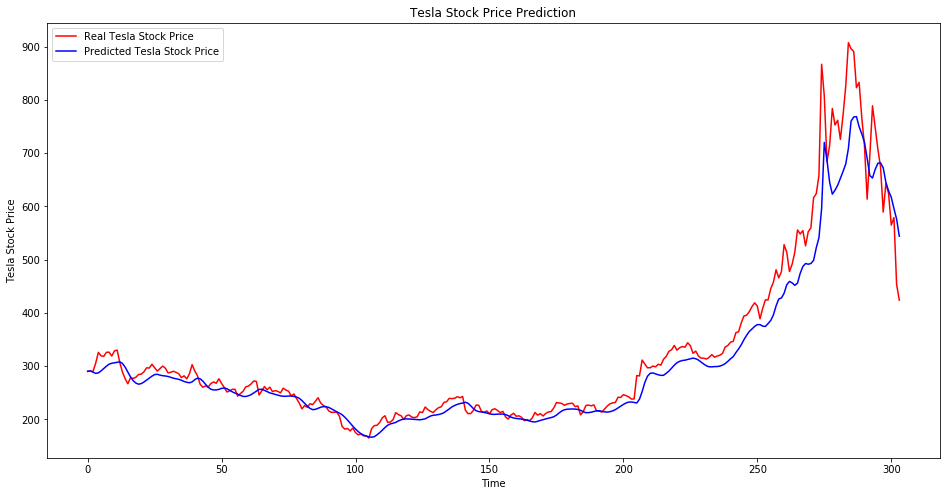

In [17]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'red', label = 'Real Tesla Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

In [ ]:
print(y_pred[20])
print(y_test[20])